# Programming Assignment 1
## Wil Gaboury

In [30]:
# imports
import a_star
import local_search as ls
import pandas as pd
import plotnine as p9
import time
import tsp

## Part 1: Exploring Search Algorithm

### 1. Randomly create a family of 30 TSP graphs/matrices for each size 5, 10, 15, 20, ...

In [31]:
def gen_graphs(n):
    result = []
    for i in range(30):
        result.append(tsp.TSPGraph.generate_random(n))
    return result

families = [
#     (2, gen_graphs(2)),
#     (3, gen_graphs(3)),
    (4, gen_graphs(4)),
    (5, gen_graphs(5)),
    (6, gen_graphs(6)),
    (7, gen_graphs(7)),
    (8, gen_graphs(8)),
    (9, gen_graphs(9)),
    (10, gen_graphs(10)),
#     (11, gen_graphs(11)),
#     (12, gen_graphs(12))
]

### 1. Run the above algorithms on each of the family of size 5, of size 10, etc....
### 2. For each family of 30 graphs/matrices you’ll compute the AVERAGE/MIN/MAX of totalcost, number of nodes, CPU and real-world runtime

In [32]:
def test_a_star(families, hs):
    df = pd.DataFrame(columns=['n', 'h', 'total_cost', 'node_count', 'cpu_time', 'real_time'])

    for graph_size, family in families:
        for h_name, h_func in hs.items():
            for i, graph in enumerate(family):    
                start_cpu_time = time.process_time()
                start_real_time = time.perf_counter()

                search_result = a_star.a_star(graph.get_start_state_node(), tsp.is_goal, h_func)

                end_cpu_time = time.process_time()
                end_real_time = time.perf_counter()

                path = search_result[0]
                
                df = df.append({
                    'n': graph_size,
                    'h': h_name,
                    'test_num': i,
                    'total_cost': search_result[0].cost(),
                    'node_count': search_result[1], 
                    'cpu_time': end_cpu_time - start_cpu_time,
                    'real_time': end_real_time - start_real_time
                }, ignore_index=True)
    
    df = df.astype({'total_cost': 'int64', 'node_count': 'int64'})
    return df

In [33]:
hs = {
    'uniform_cost': a_star.h_uniform_cost,
    'random_edge': a_star.h_random_edge,
    'smallest_edge': a_star.h_smallest_edge
}
df = test_a_star(families, hs)

df_summary = df.copy()
del df_summary['test_num']
df_summary = df_summary.groupby(['n', 'h']).agg(['mean', 'min', 'max'])
df_summary

total_cost              node_count               cpu_time  \
                        mean  min  max          mean   min    max      mean   
n  h                                                                          
4  random_edge    180.366667   94  287     12.866667     5     17  0.000166   
   smallest_edge  180.366667   94  287     14.733333    11     17  0.000205   
   uniform_cost   180.366667   94  287     15.033333    13     17  0.000174   
5  random_edge    159.100000   78  268     16.933333     6     40  0.000278   
   smallest_edge  156.300000   78  268     32.233333    13     62  0.000593   
   uniform_cost   156.300000   78  268     37.066667    19     61  0.000392   
6  random_edge    184.800000   91  276     19.766667     7     47  0.000404   
   smallest_edge  175.500000   64  276     97.900000    28    217  0.002239   
   uniform_cost   175.500000   64  276    126.733333    33    231  0.001499   
7  random_edge    217.533333  110  336     31.433333     9    111  0.000723   
   smallest_edge  187.533333   95  274    268.600000    30    633  0.008129   
   uniform_cost   187.533333   95  274    407.966667    52    838  0.005879   
8  random_edge    234.400000  136  335     27.666667    11     98  0.000773   
   smallest_edge  186.433333   65  299    683.400000    72   3141  0.028564   
   uniform_cost   186.433333   65  299   1345.533333   104   4245  0.025032   
9  random_edge    260.066667  153  359     28.233333    12     72  0.001120   
   smallest_edge  187.666667   84  265   2031.000000   290  10427  0.108505   
   uniform_cost   187.666667   84  265   4180.966667   519  16510  0.099865   
10 random_edge    281.266667  211  392     34.700000    12    113  0.001362   
   smallest_edge  193.933333  125  253   4988.033333   257  14078  0.358788   
   uniform_cost   193.933333  125  253  13848.100000  1167  37209  0.417083   

                                     real_time                      
                       min       max      mean       min       max  
n  h                                                                
4  random_edge    0.000082  0.000225  0.000166  0.000081  0.000225  
   smallest_edge  0.000167  0.000237  0.000205  0.000167  0.000236  
   uniform_cost   0.000127  0.000264  0.000170  0.000126  0.000262  
5  random_edge    0.000118  0.000585  0.000278  0.000117  0.000589  
   smallest_edge  0.000282  0.001018  0.000596  0.000281  0.001018  
   uniform_cost   0.000212  0.000594  0.000392  0.000211  0.000595  
6  random_edge    0.000174  0.000842  0.000404  0.000179  0.000846  
   smallest_edge  0.000769  0.004158  0.002246  0.000783  0.004170  
   uniform_cost   0.000424  0.002685  0.001505  0.000423  0.002704  
7  random_edge    0.000263  0.002481  0.000724  0.000263  0.002481  
   smallest_edge  0.002138  0.016021  0.008144  0.002144  0.016055  
   uniform_cost   0.000798  0.011490  0.005896  0.000798  0.011508  
8  random_edge    0.000351  0.002117  0.000773  0.000350  0.002120  
   smallest_edge  0.003516  0.097473  0.028655  0.003524  0.097980  
   uniform_cost   0.001733  0.074040  0.025066  0.001732  0.074169  
9  random_edge    0.000568  0.002610  0.001121  0.000565  0.002634  
   smallest_edge  0.020632  0.475955  0.108878  0.020730  0.477884  
   uniform_cost   0.010603  0.390747  0.100357  0.010664  0.392906  
10 random_edge    0.000609  0.003530  0.001368  0.000608  0.003534  
   smallest_edge  0.024855  0.968364  0.360322  0.024890  0.973552  
   uniform_cost   0.028098  1.155613  0.418799  0.028196  1.159643

In [34]:
df_plot = df.copy()
del df_plot['test_num']
df_plot = df_plot.groupby(['n', 'h']).agg('mean')

# fixing the nested columns
df_plot.columns = [
    'total_cost_mean', 
    'node_count_mean',
    'cpu_time_mean',
    'real_time_mean',
]
df_plot = df_plot.reset_index()

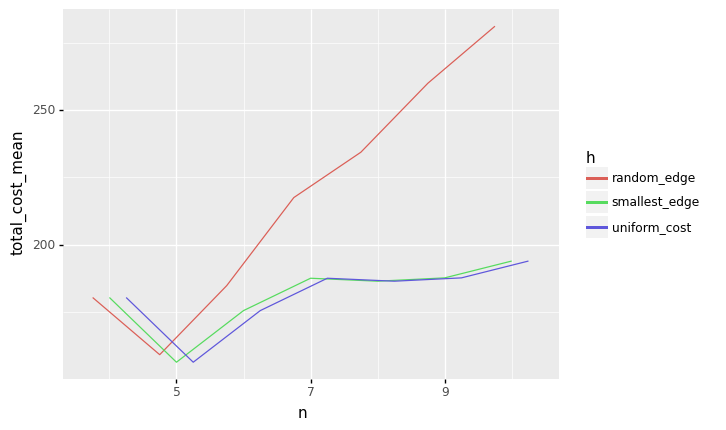

<ggplot: (8760453922696)>

In [35]:
(
    p9.ggplot(df_plot, p9.aes(x='n', y='total_cost_mean', color='h'))
        + p9.geom_line(position=p9.position_dodge2(width=0.75))
)

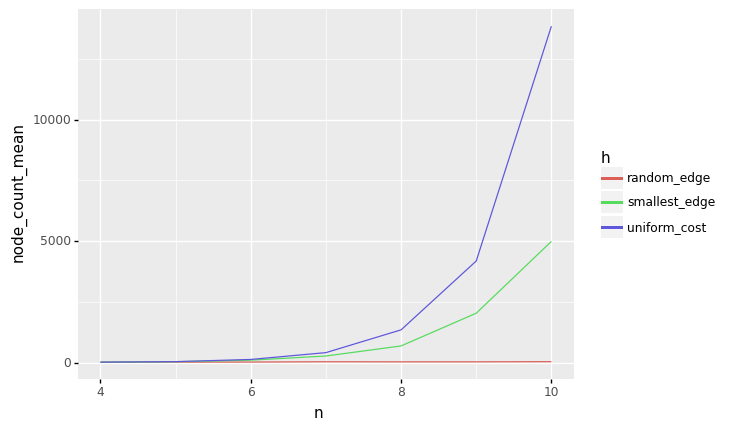

<ggplot: (8760453922759)>

In [36]:
(
    p9.ggplot(df_plot, p9.aes(x='n', y='node_count_mean', color='h'))
        + p9.geom_line()
)

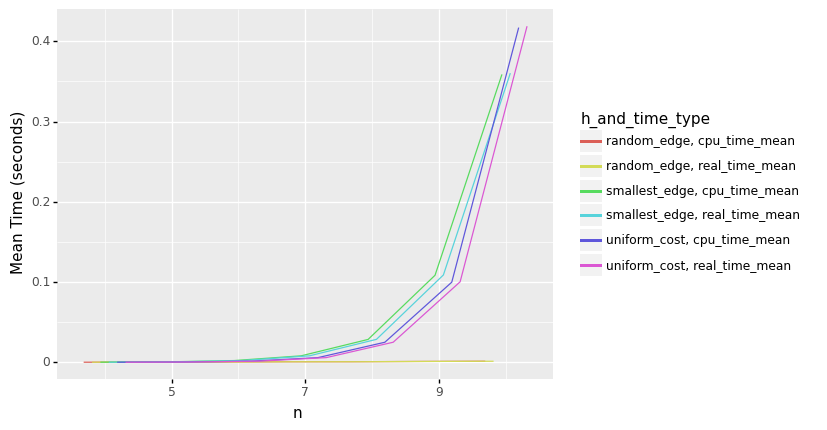

<ggplot: (8760454167260)>

In [37]:
df_time = df_plot.copy()
df_time = df_time[['n', 'h', 'cpu_time_mean', 'real_time_mean']]
df_time = pd.melt(df_time, id_vars=['n', 'h'], value_vars=['cpu_time_mean', 'real_time_mean'], 
        var_name='time_type', value_name='time_mean')
df_time['h_and_time_type'] = df_time['h'].str.cat(df_time['time_type'], sep=', ')
(
    p9.ggplot(df_time, p9.aes(x='n', y='time_mean', color='h_and_time_type'))
        + p9.geom_line(position=p9.position_dodge2(width=0.75))
        + p9.labs(y='Mean Time (seconds)')
)

### Which algorithm provides solution with the lowest cost? What’s the difference of their bestsolutions, and how that changes when the size of the graph increases?

The uniform cost search heuristic seemed to give the consistently lowest cost. This would make sense since it’s guaranteed to get the optimal outcome because it searches outward in every direction from the start node until it reaches the closest goal node. The difference in path length between all of the heuristics is small, with the maximum difference in my tests being around 10 when the size of the graph is 10. It seems that in general though the difference gets larger as n gets larger.

### Which algorithm has the least runtime and how do their runtimes change with the size ofthe graph increases?

The heuristic with the least runtime by far is the random edge heuristic. The runtimes for each heuristic get larger as the graph size gets larger.

### Is there difference between CPU and real-world runtime?

There is almost no difference on my computer between cpu and real world runtime. I can imagine if I was running another cpu intensive process on my computer at the same time there might have been a more significant difference.

## Part 2: Solve TSP with A* and MST Heuristic

In [38]:
hs = {'mst': a_star.h_mst}
df_mst = test_a_star(families, hs)
df_mst_small = pd.concat([df[df['h'] == 'smallest_edge'], df_mst])

In [39]:
df_summary = df_mst_small.copy()
del df_summary['test_num']
df_summary = df_summary.groupby(['n', 'h']).agg(['mean', 'min', 'max'])
df_summary

total_cost             node_count              cpu_time  \
                        mean  min  max         mean  min    max      mean   
n  h                                                                        
4  mst            180.366667   94  287    13.233333    9     17  0.000305   
   smallest_edge  180.366667   94  287    14.733333   11     17  0.000205   
5  mst            156.300000   78  268    23.300000   11     55  0.000692   
   smallest_edge  156.300000   78  268    32.233333   13     62  0.000593   
6  mst            175.500000   64  276    58.900000   12    176  0.002112   
   smallest_edge  175.500000   64  276    97.900000   28    217  0.002239   
7  mst            187.533333   95  274   115.433333   14    360  0.005636   
   smallest_edge  187.533333   95  274   268.600000   30    633  0.008129   
8  mst            186.433333   65  299   240.533333   20   1522  0.015082   
   smallest_edge  186.433333   65  299   683.400000   72   3141  0.028564   
9  mst            187.666667   84  265   670.600000   42   5743  0.051245   
   smallest_edge  187.666667   84  265  2031.000000  290  10427  0.108505   
10 mst            193.933333  125  253   876.133333   35   3712  0.107071   
   smallest_edge  193.933333  125  253  4988.033333  257  14078  0.358788   

                                     real_time                      
                       min       max      mean       min       max  
n  h                                                                
4  mst            0.000232  0.000417  0.000305  0.000235  0.000412  
   smallest_edge  0.000167  0.000237  0.000205  0.000167  0.000236  
5  mst            0.000419  0.001312  0.000693  0.000423  0.001312  
   smallest_edge  0.000282  0.001018  0.000596  0.000281  0.001018  
6  mst            0.000662  0.004990  0.002117  0.000662  0.005017  
   smallest_edge  0.000769  0.004158  0.002246  0.000783  0.004170  
7  mst            0.001191  0.014035  0.005652  0.001191  0.014089  
   smallest_edge  0.002138  0.016021  0.008144  0.002144  0.016055  
8  mst            0.002665  0.069533  0.015118  0.002669  0.069703  
   smallest_edge  0.003516  0.097473  0.028655  0.003524  0.097980  
9  mst            0.008006  0.311132  0.051394  0.008038  0.311976  
   smallest_edge  0.020632  0.475955  0.108878  0.020730  0.477884  
10 mst            0.009267  0.303752  0.107386  0.009298  0.304751  
   smallest_edge  0.024855  0.968364  0.360322  0.024890  0.973552

In [40]:
df_ratio = df_mst_small.copy()
del df_ratio['test_num']
df_ratio = df_ratio.groupby(['n', 'h']).agg('mean')
df_ratio.columns = [
    'total_cost_mean', 
    'node_count_mean',
    'cpu_time_mean',
    'real_time_mean',
]
df_ratio = df_ratio.reset_index()

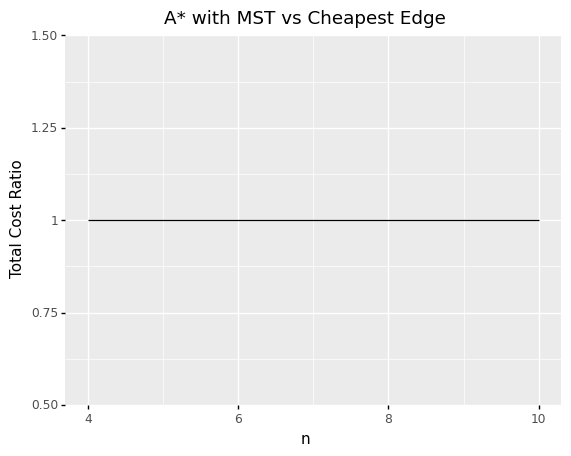

<ggplot: (8760453922744)>

In [41]:
df_cost = df_ratio[['n', 'h', 'total_cost_mean']]
df_cost = df_cost.pivot_table(index=['n'], columns='h', values='total_cost_mean')
df_cost = df_cost.reset_index()
df_cost['ratio'] = df_cost['mst'] / df_cost['smallest_edge']
(
    p9.ggplot(df_cost, p9.aes(x='n', y='ratio'))
        + p9.geom_line()
        + p9.labs(title='A* with MST vs Cheapest Edge', y='Total Cost Ratio')
)

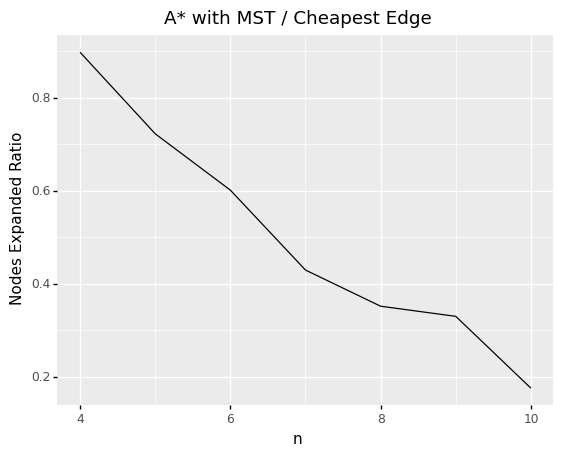

<ggplot: (8760454167203)>

In [42]:
df_count = df_ratio[['n', 'h', 'node_count_mean']]
df_count = df_count.pivot_table(index=['n'], columns='h', values='node_count_mean')
df_count = df_count.reset_index()
df_count['ratio'] = df_count['mst'] / df_count['smallest_edge']
df_count
(
    p9.ggplot(df_count, p9.aes(x='n', y='ratio'))
        + p9.geom_line()
        + p9.labs(title='A* with MST / Cheapest Edge', y='Nodes Expanded Ratio')
)

### Provide an empirical assessment showing that the MST heuristic dominates cheapest remaining edges (CRE). By how much?

Looking at the results of the test runs we can first look at the summary table from the tests showing mean, min and max. For every size of graph tested it seems that both heuristics find the same result which makes sense because because both heuristics are admisible and thus will always find the optimal result. On the otherhand using the MST heuristic expands significantly less nodes and as graph size grows the disparity between the two statistics does as well, clearly demonstrated by the graph of the ratio between nodes expanded.

In [43]:
# perform difference caluclations

df_diff = df.copy()

df_diff = pd.melt(df_diff, id_vars=['n', 'h', 'test_num'], 
                  value_vars=['total_cost', 'node_count', 'cpu_time', 'real_time'], 
                  var_name='stat_type', value_name='stat_value')

df_mst_diff = df_mst.copy()

df_mst_diff = pd.melt(df_mst_diff, id_vars=['n', 'h', 'test_num'], 
                      value_vars=['total_cost', 'node_count', 'cpu_time', 'real_time'], 
                      var_name='stat_type', value_name='stat_value')

df_diff = df_diff.merge(df_mst_diff, how='left', 
                        left_on=['n', 'test_num', 'stat_type'], 
                        right_on=['n', 'test_num', 'stat_type'])

df_diff['diff'] = df_diff['stat_value_x'] - df_diff['stat_value_y']
df_diff = df_diff[['n', 'test_num', 'h_x', 'stat_type', 'diff']]
df_diff = df_diff.rename(columns={'h_x': 'h'})

df_diff = df_diff.pivot_table(index=['n', 'test_num', 'h'], columns='stat_type', values='diff')
df_diff = df_diff.reset_index()
del df_diff['test_num']
df_diff_summary = df_diff.groupby(['n', 'h']).agg(['mean', 'min', 'max'])
df_diff_summary

cpu_time                        node_count                   \
                      mean       min       max          mean     min      max   
n  h                                                                            
4  random_edge   -0.000139 -0.000335 -0.000060     -0.366667    -6.0      4.0   
   smallest_edge -0.000100 -0.000229 -0.000040      1.500000     0.0      3.0   
   uniform_cost  -0.000132 -0.000280 -0.000010      1.800000     0.0      4.0   
5  random_edge   -0.000415 -0.000908 -0.000182     -6.366667   -28.0      4.0   
   smallest_edge -0.000099 -0.000521  0.000145      8.933333     2.0     16.0   
   uniform_cost  -0.000300 -0.000784 -0.000137     13.766667     6.0     20.0   
6  random_edge   -0.001707 -0.004453 -0.000395    -39.133333  -146.0     11.0   
   smallest_edge  0.000127 -0.000832  0.001303     39.000000     5.0     75.0   
   uniform_cost  -0.000612 -0.002306  0.000405     67.833333    20.0    110.0   
7  random_edge   -0.004913 -0.013211 -0.000700    -84.000000  -318.0     18.0   
   smallest_edge  0.002493 -0.000054  0.006118    153.166667    16.0    329.0   
   uniform_cost   0.000243 -0.003257  0.004737    292.533333    38.0    516.0   
8  random_edge   -0.014310 -0.067416 -0.001045   -212.866667 -1424.0     40.0   
   smallest_edge  0.013482 -0.000218  0.058092    442.866667    34.0   1619.0   
   uniform_cost   0.009950 -0.006915  0.049701   1105.000000    84.0   3021.0   
9  random_edge   -0.050125 -0.308522 -0.007088   -642.366667 -5683.0     -1.0   
   smallest_edge  0.057260  0.011063  0.221540   1360.400000   227.0   5717.0   
   uniform_cost   0.048620  0.002597  0.169971   3510.366667   456.0  12814.0   
10 random_edge   -0.105709 -0.301799 -0.008357   -841.433333 -3672.0    -13.0   
   smallest_edge  0.251717  0.009829  0.774005   4111.900000   180.0  12567.0   
   uniform_cost   0.310011  0.018830  0.961253  12971.966667  1132.0  35698.0   

                 real_time                     total_cost               
                      mean       min       max       mean   min    max  
n  h                                                                    
4  random_edge   -0.000140 -0.000331 -0.000064   0.000000   0.0    0.0  
   smallest_edge -0.000100 -0.000225 -0.000046   0.000000   0.0    0.0  
   uniform_cost  -0.000136 -0.000278 -0.000046   0.000000   0.0    0.0  
5  random_edge   -0.000415 -0.000919 -0.000182   2.800000   0.0   43.0  
   smallest_edge -0.000097 -0.000522  0.000150   0.000000   0.0    0.0  
   uniform_cost  -0.000301 -0.000785 -0.000136   0.000000   0.0    0.0  
6  random_edge   -0.001712 -0.004480 -0.000395   9.300000   0.0   55.0  
   smallest_edge  0.000129 -0.000847  0.001307   0.000000   0.0    0.0  
   uniform_cost  -0.000611 -0.002312  0.000405   0.000000   0.0    0.0  
7  random_edge   -0.004928 -0.013269 -0.000700  30.000000   0.0  106.0  
   smallest_edge  0.002492 -0.000081  0.006123   0.000000   0.0    0.0  
   uniform_cost   0.000245 -0.003214  0.004738   0.000000   0.0    0.0  
8  random_edge   -0.014345 -0.067583 -0.001046  47.966667   0.0  168.0  
   smallest_edge  0.013537 -0.000215  0.058472   0.000000   0.0    0.0  
   uniform_cost   0.009948 -0.006916  0.049779   0.000000   0.0    0.0  
9  random_edge   -0.050273 -0.309341 -0.007117  72.400000  13.0  181.0  
   smallest_edge  0.057484  0.011047  0.222081   0.000000   0.0    0.0  
   uniform_cost   0.048963  0.002626  0.171498   0.000000   0.0    0.0  
10 random_edge   -0.106018 -0.302794 -0.008389  87.333333  11.0  151.0  
   smallest_edge  0.252937  0.009816  0.778661   0.000000   0.0    0.0  
   uniform_cost   0.311414  0.018897  0.964751   0.000000   0.0    0.0

The above is a table of the mean/min/max of the differences between each catagory in the original test and the values of the mst test

In [44]:
# prepping plot dataframe
df_plot = df_diff.groupby(['n', 'h']).agg(['mean'])
df_plot.columns = [
    'cpu_time_mean',
    'node_count_mean',
    'real_time_mean',
    'total_cost_mean',
]
df_plot = df_plot.reset_index()

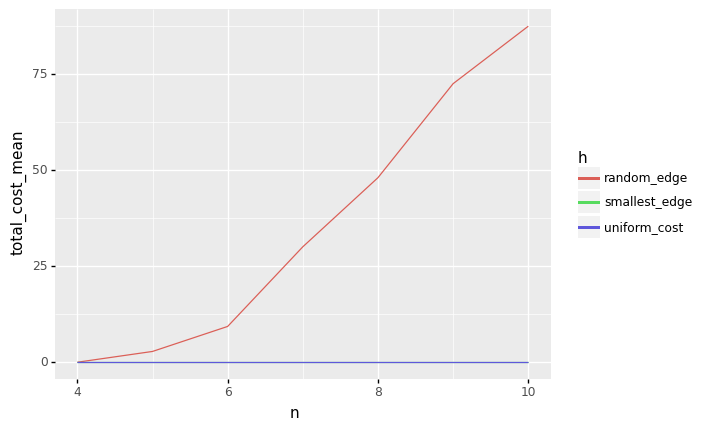

<ggplot: (8760454028255)>

In [45]:
(
    p9.ggplot(df_plot, p9.aes(x='n', y='total_cost_mean', color='h'))
        + p9.geom_line()
)

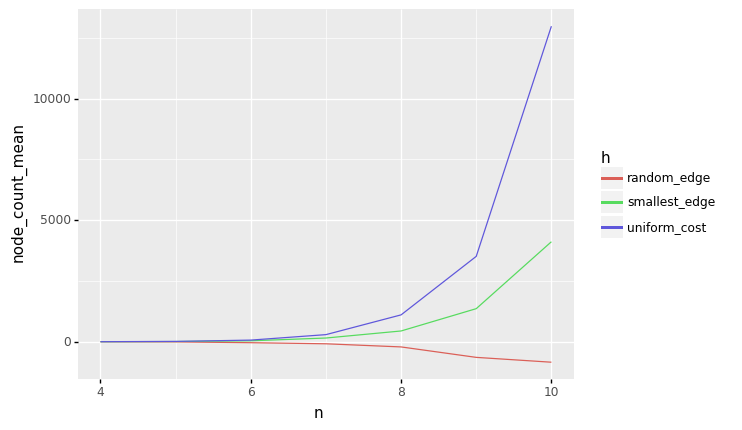

<ggplot: (8760571499632)>

In [46]:
(
    p9.ggplot(df_plot, p9.aes(x='n', y='node_count_mean', color='h'))
        + p9.geom_line()
)

### Compare the result of A* with MST with results from Part 1

Again since MST, Cheapest Remaining Edge, and Uniform Cost Search are all admissible the result found by performing A* with these heuristics will always result in the same optimal result. Looking at the first of the two graphs above the random edge cost difference keeps going up whereas the the other heuristics will stay at zero. On the otherhand looking at the difference in nodes counted, uniform cost expands by far the most nodes because it essentially searches outward equally in every direction from the origin. The smallest edge differce also goes up because it's not as tight of a heuristic as MST and thus will expand more nodes. Random edge expands less nodes because it caused A* to search the state space somewhat irradically and find suboptial solutions usually quicker.

## Part 3: Explore Local Search Algorithm

In [47]:
def test_local_search_alg(families, funcs):
    df = pd.DataFrame(columns=['n', 'search_type', 'total_cost', 'cpu_time', 'real_time'])

    for graph_size, family in families:
        for func_name, func in funcs.items():
            for i, graph in enumerate(family):
                start_cpu_time = time.process_time()
                start_real_time = time.perf_counter()

                search_result = func(graph)

                end_cpu_time = time.process_time()
                end_real_time = time.perf_counter()
                
                df = df.append({
                    'n': graph_size,
                    'search_type': func_name,
                    'test_num': i,
                    'total_cost': tsp.path_cost(search_result, graph),
                    'cpu_time': end_cpu_time - start_cpu_time,
                    'real_time': end_real_time - start_real_time
                }, ignore_index=True)
    
    df = df.astype({'total_cost': 'int64'})
    return df

In [48]:
families = [
    (4, gen_graphs(4)),
    (5, gen_graphs(5)),
    (6, gen_graphs(6)),
    (7, gen_graphs(7)),
    (8, gen_graphs(8)),
    (9, gen_graphs(9)),
    (10, gen_graphs(10)),
    
#     (5, gen_graphs(5)),
#     (10, gen_graphs(10)),
#     (15, gen_graphs(15)),
#     (20, gen_graphs(20)),
]

In [49]:
# contants for algorithms

hill_climbing_restarts = 100

simulated_annealing_iterations = 100
simulated_annealing_cooling_factor = 0.96

genetic_alg_iterations = 250
genetic_alg_population_size = 250
genetic_alg_mutation_factor = 0.5

In [50]:
funcs = {
    'hill_climbing': lambda g: ls.hillClimbing(g, hill_climbing_restarts),
    'simulated_annealing': lambda g: ls.simuAnnealing(g, simulated_annealing_iterations, simulated_annealing_cooling_factor),
    'genetic_algorithm': lambda g: ls.genetic(g, genetic_alg_iterations, genetic_alg_population_size, genetic_alg_mutation_factor)
}

In [51]:
df = test_local_search_alg(families, funcs)
df_mst = test_a_star(families, { 'mst': a_star.h_mst })
del df_mst['node_count']
df_mst = df_mst.rename(columns={'h': 'search_type'})
df_comb = df.append(df_mst, ignore_index=True)

df_summary = df_comb.copy();
del df_summary['test_num']
df_summary.groupby(['n', 'search_type']).agg(['mean', 'max', 'min'])

total_cost            cpu_time                      \
                              mean  max  min      mean       max       min   
n  search_type                                                               
4  genetic_algorithm    188.133333  293  104  0.235999  0.238284  0.233796   
   hill_climbing        188.133333  293  104  0.001524  0.001855  0.001470   
   mst                  188.133333  293  104  0.000296  0.000353  0.000221   
   simulated_annealing  188.133333  293  104  0.000897  0.000948  0.000880   
5  genetic_algorithm    166.700000  303   62  0.256564  0.259366  0.254075   
   hill_climbing        166.700000  303   62  0.001964  0.002129  0.001902   
   mst                  166.700000  303   62  0.000805  0.001308  0.000386   
   simulated_annealing  166.700000  303   62  0.000974  0.001376  0.000933   
6  genetic_algorithm    165.266667  255   94  0.277649  0.285991  0.274865   
   hill_climbing        169.066667  259   94  0.002489  0.003244  0.002403   
   mst                  165.266667  255   94  0.001997  0.004216  0.000761   
   simulated_annealing  166.266667  255   94  0.001032  0.001168  0.000991   
7  genetic_algorithm    198.200000  328   72  0.296805  0.304146  0.292474   
   hill_climbing        211.766667  336   72  0.003057  0.003816  0.002858   
   mst                  190.033333  303   72  0.006255  0.023339  0.001422   
   simulated_annealing  192.900000  303   72  0.001106  0.001672  0.001035   
8  genetic_algorithm    237.700000  401  148  0.319558  0.336900  0.315391   
   hill_climbing        250.633333  384  167  0.003599  0.003883  0.003481   
   mst                  202.433333  358  119  0.015020  0.071733  0.003191   
   simulated_annealing  213.033333  364  119  0.001132  0.001230  0.001095   
9  genetic_algorithm    266.966667  366  150  0.337913  0.339886  0.336014   
   hill_climbing        288.633333  404  142  0.004240  0.004714  0.004091   
   mst                  207.700000  317   78  0.043462  0.145062  0.008922   
   simulated_annealing  230.066667  324  109  0.001183  0.001297  0.001150   
10 genetic_algorithm    303.833333  421  206  0.360916  0.369921  0.357841   
   hill_climbing        317.566667  426  183  0.004938  0.005602  0.004720   
   mst                  208.066667  328  140  0.128730  0.317209  0.014354   
   simulated_annealing  250.833333  353  150  0.001251  0.001587  0.001190   

                       real_time                      
                            mean       max       min  
n  search_type                                        
4  genetic_algorithm    0.236299  0.238582  0.234060  
   hill_climbing        0.001525  0.001866  0.001467  
   mst                  0.000296  0.000351  0.000220  
   simulated_annealing  0.000897  0.000947  0.000879  
5  genetic_algorithm    0.256908  0.259720  0.254363  
   hill_climbing        0.001966  0.002134  0.001902  
   mst                  0.000806  0.001311  0.000385  
   simulated_annealing  0.000974  0.001377  0.000933  
6  genetic_algorithm    0.278042  0.286469  0.275272  
   hill_climbing        0.002492  0.003253  0.002406  
   mst                  0.001999  0.004220  0.000760  
   simulated_annealing  0.001033  0.001173  0.000991  
7  genetic_algorithm    0.297245  0.304575  0.292877  
   hill_climbing        0.003062  0.003835  0.002862  
   mst                  0.006264  0.023367  0.001426  
   simulated_annealing  0.001106  0.001667  0.001034  
8  genetic_algorithm    0.319989  0.337369  0.315762  
   hill_climbing        0.003604  0.003888  0.003483  
   mst                  0.015041  0.071823  0.003197  
   simulated_annealing  0.001134  0.001234  0.001096  
9  genetic_algorithm    0.338360  0.340313  0.336451  
   hill_climbing        0.004245  0.004720  0.004097  
   mst                  0.043523  0.145267  0.008935  
   simulated_annealing  0.001186  0.001301  0.001150  
10 genetic_algorithm    0.361382  0.370419  0.358259  
   hill_climbing        0.004945  0.005619  0.004723  
   mst    

In [52]:
df_plot = df_comb.copy()
del df_plot['test_num']
df_plot = df_plot.groupby(['n', 'search_type']).agg(['mean'])
df_plot.columns = [
    'total_cost_mean', 
    'cpu_time_mean',
    'real_time_mean',
]
df_plot = df_plot.reset_index()

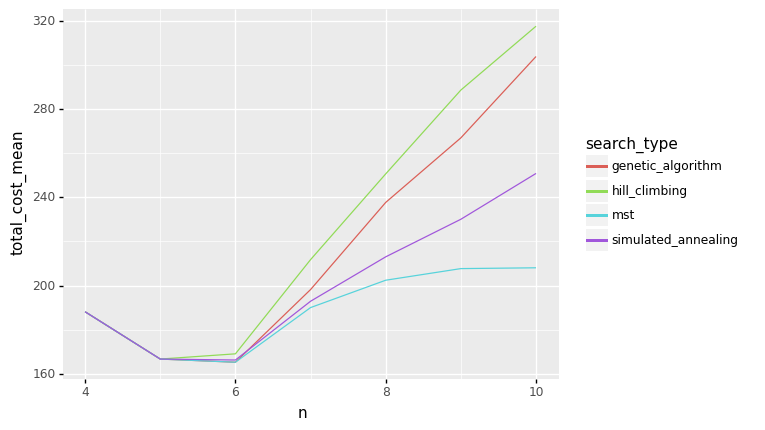

<ggplot: (8760454157713)>

In [53]:
(
    p9.ggplot(df_plot, p9.aes(x='n', y='total_cost_mean', color='search_type'))
        + p9.geom_line()
)

In [54]:
#perform difference caluclations
df_diff = df.copy()
df_diff = df_diff[['n', 'test_num', 'search_type', 'total_cost', 'cpu_time']]

df_mst_diff = df_mst.copy()
df_mst_diff = df_mst_diff[['n', 'test_num', 'search_type', 'total_cost', 'cpu_time']]

df_diff = df_diff.merge(df_mst_diff, how='left', 
                        left_on=['n', 'test_num'], 
                        right_on=['n', 'test_num'])

df_diff['diff'] = df_diff['total_cost_x'] - df_diff['total_cost_y']
df_diff = df_diff[['n', 'search_type_x', 'diff', 'cpu_time_x']]
df_diff = df_diff.rename(columns={'search_type_x': 'search_type', 'cpu_time_x': 'cpu_time'})

df_diff_summary = df_diff.groupby(['n', 'search_type']).agg(['mean', 'min', 'max'])
df_diff_summary

diff           cpu_time                    
                              mean min  max      mean       min       max
n  search_type                                                           
4  genetic_algorithm      0.000000   0    0  0.235999  0.233796  0.238284
   hill_climbing          0.000000   0    0  0.001524  0.001470  0.001855
   simulated_annealing    0.000000   0    0  0.000897  0.000880  0.000948
5  genetic_algorithm      0.000000   0    0  0.256564  0.254075  0.259366
   hill_climbing          0.000000   0    0  0.001964  0.001902  0.002129
   simulated_annealing    0.000000   0    0  0.000974  0.000933  0.001376
6  genetic_algorithm      0.000000   0    0  0.277649  0.274865  0.285991
   hill_climbing          3.800000   0   33  0.002489  0.002403  0.003244
   simulated_annealing    1.000000   0   14  0.001032  0.000991  0.001168
7  genetic_algorithm      8.166667   0   43  0.296805  0.292474  0.304146
   hill_climbing         21.733333   0   73  0.003057  0.002858  0.003816
   simulated_annealing    2.866667   0   60  0.001106  0.001035  0.001672
8  genetic_algorithm     35.266667   6   92  0.319558  0.315391  0.336900
   hill_climbing         48.200000   0   98  0.003599  0.003481  0.003883
   simulated_annealing   10.600000   0   60  0.001132  0.001095  0.001230
9  genetic_algorithm     59.266667   0  110  0.337913  0.336014  0.339886
   hill_climbing         80.933333   5  148  0.004240  0.004091  0.004714
   simulated_annealing   22.366667   0   63  0.001183  0.001150  0.001297
10 genetic_algorithm     95.766667  14  175  0.360916  0.357841  0.369921
   hill_climbing        109.500000  11  193  0.004938  0.004720  0.005602
   simulated_annealing   42.766667   0  144  0.001251  0.001190  0.001587

In [55]:
df_diff_summary.columns = ['diff_mean', 'diff_min', 'diff_max', 'cpu_time_mean', 'cpu_time_min', 'cpu_time_max']
df_diff_summary = df_diff_summary.reset_index()
df_diff_summary = df_diff_summary.drop(['cpu_time_min', 'cpu_time_max'], axis=1)
df_diff_summary = pd.melt(df_diff_summary, id_vars=['n', 'search_type', 'cpu_time_mean'], 
                          value_vars=['diff_mean', 'diff_min', 'diff_max'], 
                          var_name='diff_type', value_name='diff_value')

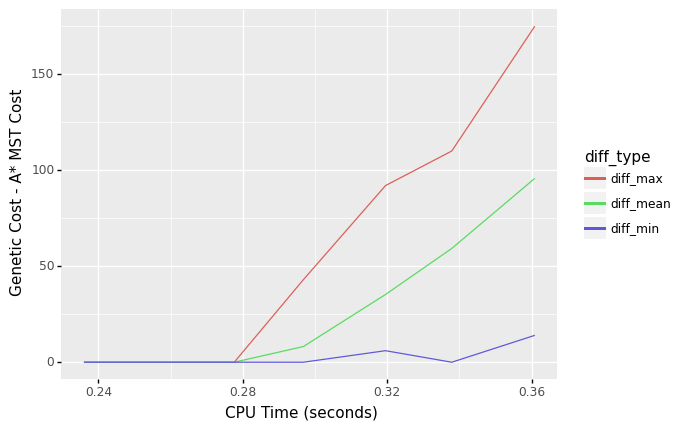

<ggplot: (8760453929397)>

In [56]:
(
    p9.ggplot(df_diff_summary[df_diff_summary['search_type'] == 'genetic_algorithm'], 
              p9.aes(x='cpu_time_mean', y='diff_value', color='diff_type'))
        + p9.geom_line()
        + p9.labs(x='CPU Time (seconds)', y='Genetic Cost - A* MST Cost')
)

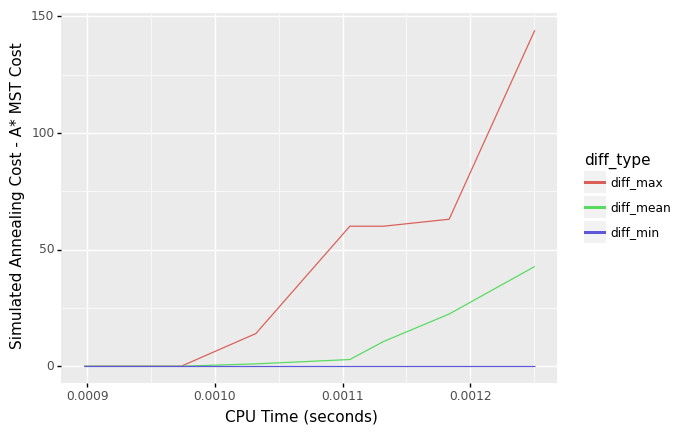

<ggplot: (8760454167047)>

In [57]:
(
    p9.ggplot(df_diff_summary[df_diff_summary['search_type'] == 'simulated_annealing'], 
              p9.aes(x='cpu_time_mean', y='diff_value', color='diff_type'))
        + p9.geom_line()
        + p9.labs(x='CPU Time (seconds)', y='Simulated Annealing Cost - A* MST Cost')
)

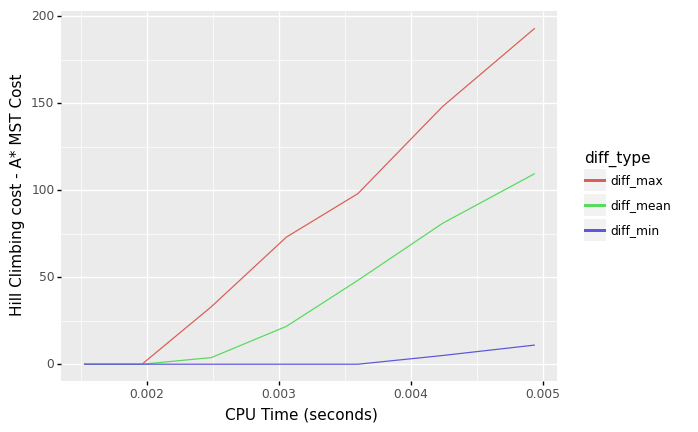

<ggplot: (8760454100231)>

In [58]:
(
    p9.ggplot(df_diff_summary[df_diff_summary['search_type'] == 'hill_climbing'], 
              p9.aes(x='cpu_time_mean', y='diff_value', color='diff_type'))
        + p9.geom_line()
        + p9.labs(x='CPU Time (seconds)', y='Hill Climbing cost - A* MST Cost')
)